# 南山理賠服務及理賠再購資料探索

## 資料型態

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

#function drawing Barplot
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    font = font_manager.FontProperties(fname='msjh.ttc',weight='bold',style='normal', size=16)
    plt.figure(figsize = (15,8))
    ax = plt.subplot(1,1,1)
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # to remove line between points
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 20)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 20)
    ax.set_xticklabels(x_data,fontproperties = font, rotation = 90, fontsize = 15)
    ax.set_title(title)

# 讀取 CSV File
df = pd.read_csv('CLAIM.csv',encoding = 'big5')
df2 = df.fillna(0) #將Nah轉為0
df2.head()

,CASE_NO,INSURED_SEX,AGE_RANK,TENURE,ILLNESS_CD,illness_code_desc,HOSP_CD,hospital_name,REIMB_AMT_K,settle_dt,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,EFFECTdate,TYPE_CODE,AFYP_K
0,1,F,02.21~40,16,A47202,橈骨骨折,DM0068,澄清綜合醫院（中港分院）,7,2017/10/25,0.0,0.0,16,1.0,18.0,0,0,0.0
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,UM0011,新光醫院,18,2017/3/3,3.0,71.0,16,2.0,23.0,0,0,0.0
2,3,M,02.21~40,24,A29101,腦中風,UM0009,長庚醫院(林口、台北、桃園),5,2017/9/15,0.0,0.0,24,3.0,44.0,0,0,0.0
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",UM0098,台安醫院,0,2017/3/8,5.0,32.0,28,3.0,27.0,0,0,0.0
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,UM0100,博仁醫院,2,2017/7/6,7.0,133.0,27,4.0,44.0,0,0,0.0


# 有再購跟沒再購人數

無再購: 103974
有再購: 3637


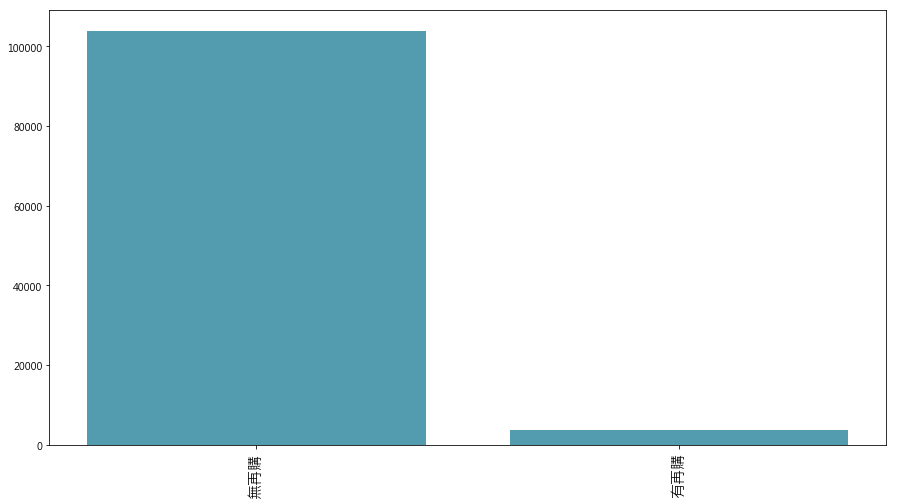

In [10]:
no_rebuy = df2[df2['EFFECTdate'] == 0] #無回購表單的人
rebuy = df2[df2['EFFECTdate'] != 0]
print('無再購'+':', len(no_rebuy))
print('有再購'+':', len(rebuy))
barplot(['無再購','有再購'],[len(no_rebuy),len(rebuy)])

# 觀察有/無再購的年齡層人數分布
由兩張長條圖可以發現兩種類型分布沒有顯著差距
* 年齡層 21~40歲所佔人數皆為最高，可見這樣的年齡層為最主要的客戶。
* 其他年齡層0~20次之，再來41~60，最後則是61+。
* 以下繼續探討20~40歲年齡層所保的保單類型是否可以發現潛力商品。

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


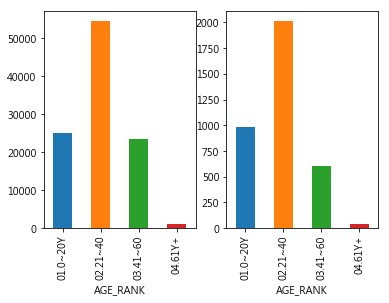

In [11]:
plt.subplot(1,2,1)
agegroup2 = no_rebuy.groupby("AGE_RANK")
data = agegroup2.size() #年齡分層每個組別內的大小
data.plot.bar()

plt.subplot(1,2,2)
agegroup = rebuy.groupby("AGE_RANK")
print(type(agegroup))
data2 =agegroup.size() #每個組別內的大小
data2.plot(kind = 'bar')
plt.show()
# barplot(dict(agegroup2.size()).keys(), dict(agegroup2.size()).values())

# 觀察各年齡層五年內總理賠金差異
* 即便人數最多，我們不能確定該年齡層是否為收入的主要來源，所以以下用長條圖和圓餅圖來呈現實際數字與比例上的差異。
* 下兩圖縱軸為五年內總理賠金(單位:千)，橫軸為各年齡層。左圖為沒有再購五年總理賠金，右圖為有再購五年總理賠金。
* 其中有趣的是0~20歲為其中第三多的，與上面圖表結合，可出略判斷其人數為第二多，金額卻沒有比較多，猜測為父母樂於幫小朋友投小金額保單。
* 如此一來可以確定年齡層21~40，為人數和理賠金總額都為最多，接下來繼續探討投哪些項目的保單。

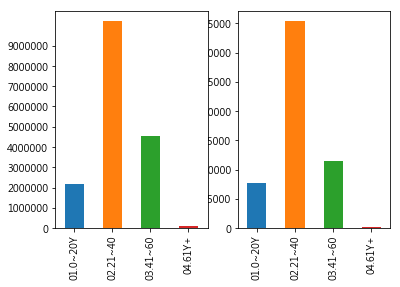

In [12]:
plt.subplot(1,2,2)
a = agegroup.get_group("01.0~20Y")["REIMB_AMT_5Y_K"].sum()
b = agegroup.get_group("02.21~40")["REIMB_AMT_5Y_K"].sum()
c = agegroup.get_group("03.41~60")["REIMB_AMT_5Y_K"].sum()
d = agegroup.get_group("04.61Y+")["REIMB_AMT_5Y_K"].sum()
y_data = pd.Series(data = np.array([a,b,c,d]), index = ["01.0~20Y","02.21~40","03.41~60","04.61Y+"])
y_data.plot(kind = 'bar')

#1e7為10^7
plt.subplot(1,2,1)
a2 = agegroup2.get_group("01.0~20Y")["REIMB_AMT_5Y_K"].sum()
b2 = agegroup2.get_group("02.21~40")["REIMB_AMT_5Y_K"].sum()
c2 = agegroup2.get_group("03.41~60")["REIMB_AMT_5Y_K"].sum()
d2 = agegroup2.get_group("04.61Y+")["REIMB_AMT_5Y_K"].sum()
y_data2 = pd.Series(data = np.array([a2,b2,c2,d2]), index = ["01.0~20Y","02.21~40","03.41~60","04.61Y+"])
y_data2.plot(kind = 'bar')
my_y_ticks = np.arange(0, 10**7, 1000000)
plt.yticks(my_y_ticks)

plt.show()
plt.close()

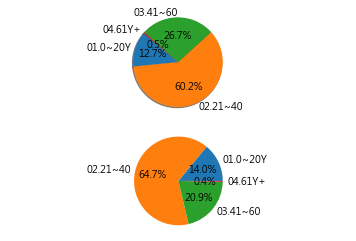

In [13]:
plt.subplot(2,1,1)
plt.pie([a2,b2,c2,d2], labels=["01.0~20Y","02.21~40","03.41~60","04.61Y+"], autopct='%1.1f%%',shadow=True, startangle=140)
plt.axis('equal')

plt.subplot(2,1,2)
plt.pie([a,b,c,d], labels=["01.0~20Y","02.21~40","03.41~60","04.61Y+"], autopct='%1.1f%%')
plt.axis('equal')

plt.show()
plt.close()

# 觀察 "排除21-40歲" 跟 "21-40歲" 的理賠項目
> 透過觀察最常出現的20個病因，兩個族群最常被理賠的項目都是比較日常的傷害如'脫臼，扭，拉，挫，捩傷'等等，後面幾項也多有雷同，表示這些項目不論年齡層都會時常發生。那下個問題來啦大家耳熟能詳的癌症等等重症保單跑去哪裡了?由於這些重症不常發生，所以出現次數越少，但是接下來透過五年內理賠次數作為Y軸依據的話，就會衝上來啦。接下來關注再21~40歲繼續深入探討!

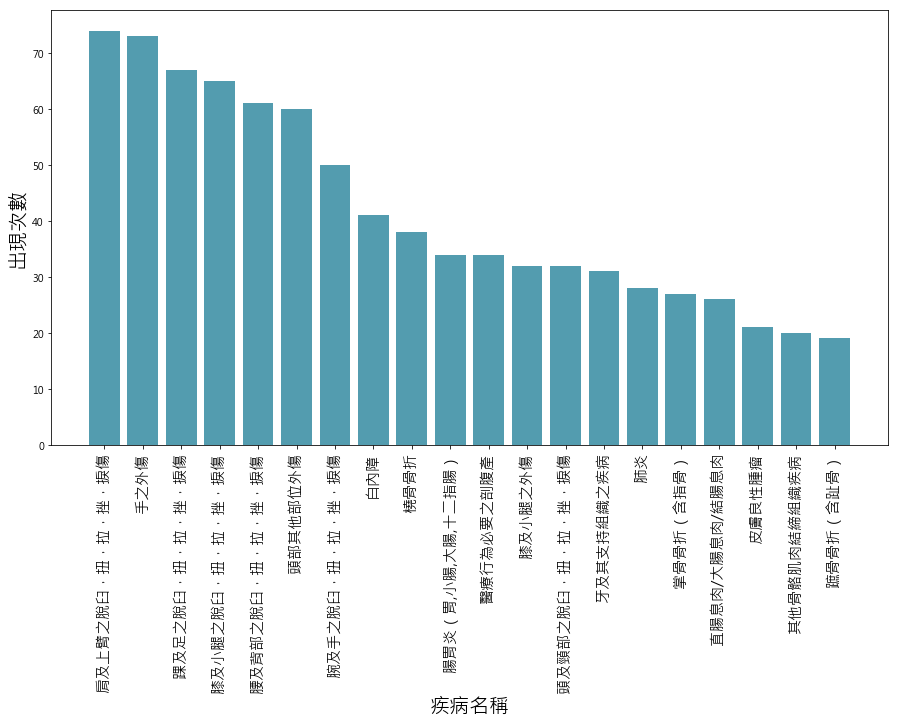

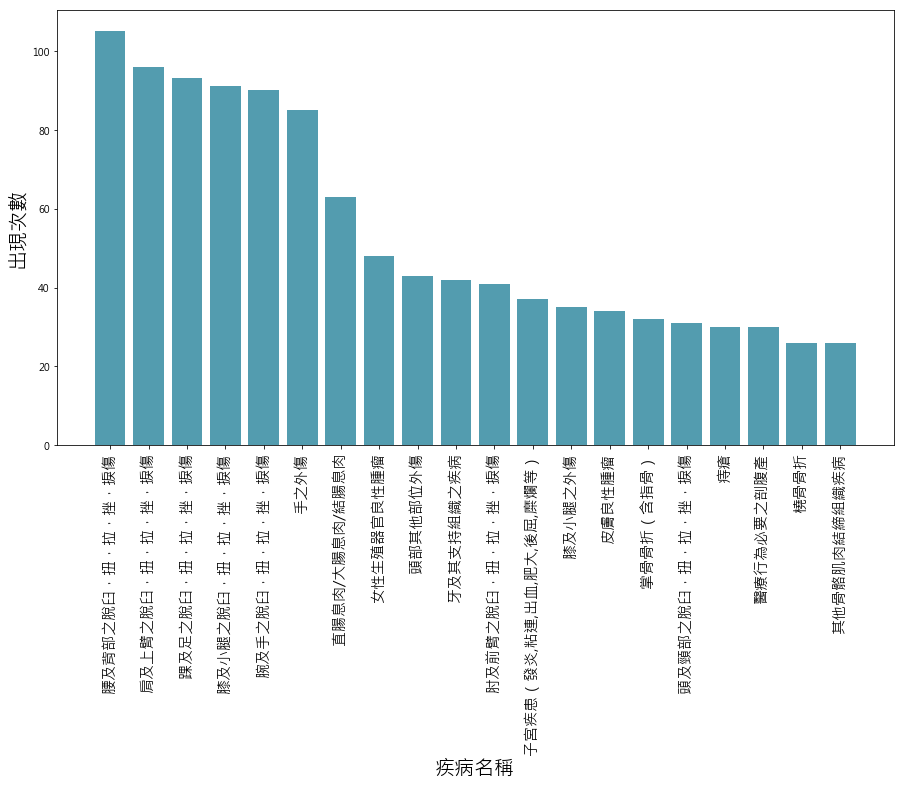

In [14]:
rebuyillness = rebuy.groupby("illness_code_desc")
GG = (agegroup.get_group("01.0~20Y").append(agegroup.get_group("03.41~60"))).append(agegroup.get_group("04.61Y+"))
rebuysort = GG.groupby("illness_code_desc").size().sort_values(ascending = False)
name = list(rebuysort.index)
value =rebuysort.tolist()
barplot(name[:20], value[:20], x_label ='疾病名稱', y_label = '出現次數')

G2040 = agegroup.get_group("02.21~40").groupby('illness_code_desc').size().sort_values(ascending = False)
name2 = list(G2040.index)
value2 = G2040.tolist()
barplot(name2[:20], value2[:20], x_label ='疾病名稱', y_label = '出現次數')

# 觀察21-40歲各保單病因五年內平均跟總額理賠金
* 首先平均保單每張金額前20名的可大致分為惡性腫瘤，癌症，器官，血管等。但是雖然金額高，卻不一定代表總額多，所以必須加入總張數的因素，探討總額。
* 算出來的總額前20名如下圖，與上個Section比較的話，可以發現乳房癌症越居榜首(數量大，也有單張金額大)。令人驚訝的是沒有在前20名以內的骨折類項等項目，雖然金額較小，卻因為時常理賠，讓總額在不小的數目。
* 透過21-40歲五年內理賠總額圖可以看出來平常大部分比例支出分為兩種。一，頻率小金額高的重症型。二，高頻率金額低的日常生活型。

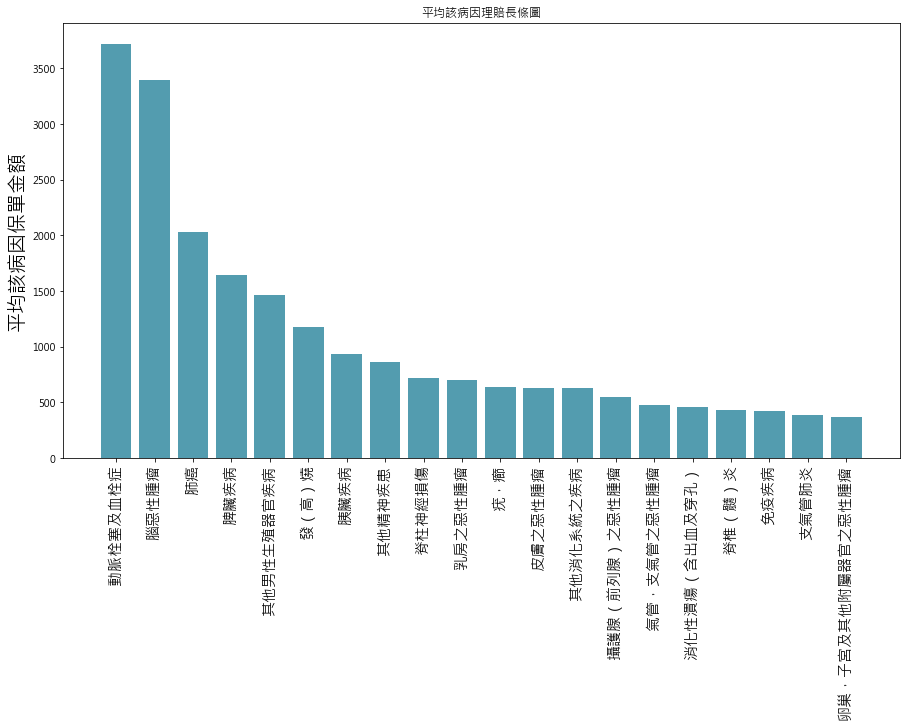

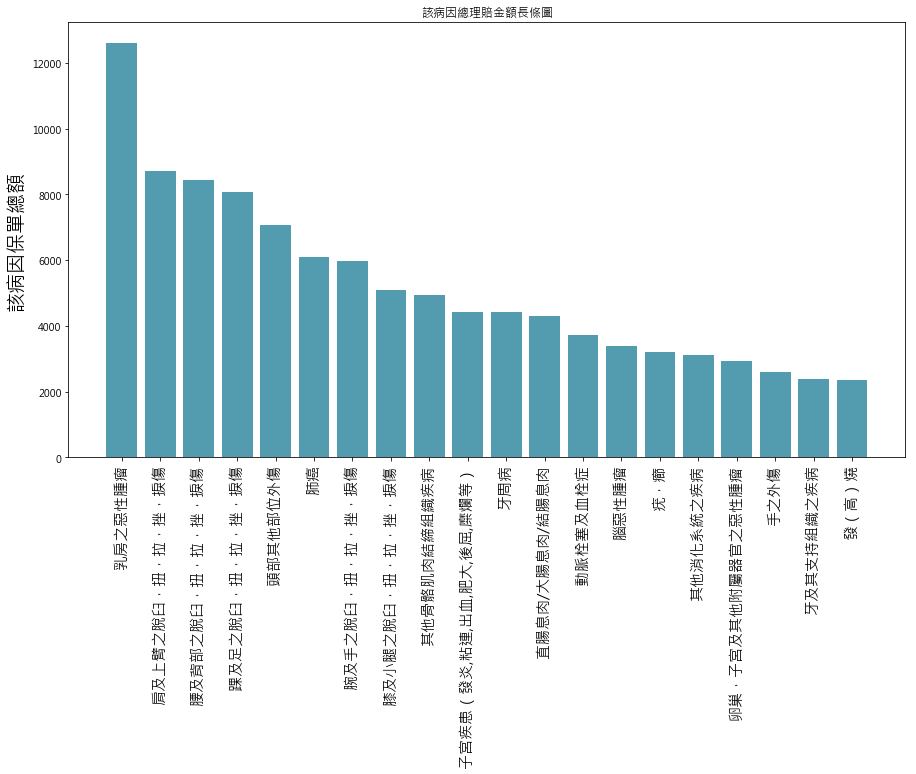

In [15]:
meanlistrebuy = []
sumlistrebuy = []
rebuyillness = agegroup.get_group("02.21~40").groupby('illness_code_desc')
for i in name2:
    a = rebuyillness.get_group(i)["REIMB_AMT_5Y_K"].mean()
    b = rebuyillness.get_group(i)["REIMB_AMT_5Y_K"].sum()
    meanlistrebuy.append(a)
    sumlistrebuy.append(b)
rebuywholedatamoney = sorted(list(zip(name2,sumlistrebuy)), key=lambda x: x[1],reverse = True)
rebuymeandatamoney = sorted(list(zip(name2,meanlistrebuy)), key=lambda x: x[1],reverse = True)
#barplot with list of tuples
d = dict(Counter(dict(rebuymeandatamoney)).most_common(20))
d2 = dict(Counter(dict(rebuywholedatamoney)).most_common(20))
barplot(d.keys(),d.values(), y_label = "平均該病因保單金額", title = "平均該病因理賠長條圖")
barplot(d2.keys(),d2.values(),y_label = "該病因保單總額", title = "該病因總理賠金額長條圖")

# 試算21-40歲每個病因的利潤
* 透過拿到的資料，設立試算利潤。算式: 已購買保單總年化保費(Sum_afyp_K,單位:千) - 五年內總理賠金額(REIMB_AMT_5Y_K,單位:千)/5 = 利潤，五年內直接除以5是不嚴謹的計算方式，但以手上拿到的資料，利用這樣的算式簡單觀測各病因利潤。

In [16]:
def show(val):
    color = 'red' if val < 0 else 'green'
    return 'color:%s' % color

topincome = agegroup.get_group("02.21~40").groupby('illness_code_desc')
topincomedf = topincome[['REIMB_AMT_5Y_K','AFYP_K','Sum_afyp_K']].sum()
topincomedf['Count'] = dict(topincome.size()).values()
topincomedf['RevenuePercent'] = topincomedf['Sum_afyp_K'].apply(lambda x: (x / topincomedf['Sum_afyp_K'].sum())*100)
topincomedf['RevenuePercent'] = topincomedf['REIMB_AMT_5Y_K'].apply(lambda x: (x / 5))
topincomedf['Income'] =  + topincomedf['Sum_afyp_K']  - topincomedf['REIMB_AMT_5Y_K'] #topincomedf['AFYP_K']
income = topincomedf['Income'].sum()
#topincomedf.sort_values(by=['RevenuePercent'], ascending = False)
topincomedf = topincomedf.sort_values(by=['Income'], ascending = False)
topincomedf.style.applymap(show, subset = pd.IndexSlice[:,'Income'])

,REIMB_AMT_5Y_K,AFYP_K,Sum_afyp_K,Count,RevenuePercent,Income
illness_code_desc,,,,,,
踝及足之脫臼，扭，拉，挫，捩傷,8059,5650,56543,93,1611.8,48484
直腸息肉/大腸息肉/結腸息肉,4309,8070,46269,63,861.8,41960
皮膚良性腫瘤,1460,4286,35632,34,292,34172
手之外傷,2601,7042,36032,85,520.2,33431
肩及上臂之脫臼，扭，拉，挫，捩傷,8707,8792,34439,96,1741.4,25732
頭部其他部位外傷,7079,5963,32443,43,1415.8,25364
"子宮疾患（發炎,粘連,出血,肥大,後屈,糜爛等）",4413,5014,28893,37,882.6,24480
支氣管肺炎,1155,100,22834,3,231,21679
腰及背部之脫臼，扭，拉，挫，捩傷,8435,10454,28560,105,1687,20125


# 小結
* 綠色為利潤為正，紅色為利潤為負。由結果呈現，利潤較高的多為日常型的(如'脫臼，扭，拉，挫，捩傷'、眼睛疾病、腰/背痛等等)也是一般人生活中會遇到的。利潤為負的多為重症型(如惡性腫瘤，癌症等等)，多數人不會遇到，卻是最需要保險幫助的病因。由此觀察出來南山人壽在於關懷罹癌和長照確實是不遺餘力，在於外溢保單客戶也是最近流行的買保單方式也有相當成功的獲利。
* 南山人壽可以朝現在的發展型態前進，持續推出兩種主流商品
 * 符合現在**趨勢**或是**必備**的**日常型商品**
 * 推廣雖利潤為負卻可以推廣**企業形象**的**重症型商品**。

# 地區分組

In [4]:
df7 = df.fillna('0')
df7['HOSP_CODE'] = df.HOSP_CD.str[:2]
df7 = df7.drop(columns = ['HOSP_CD'])
df7

,CASE_NO,INSURED_SEX,AGE_RANK,TENURE,ILLNESS_CD,illness_code_desc,hospital_name,REIMB_AMT_K,settle_dt,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,EFFECTdate,TYPE_CODE,AFYP_K,HOSP_CODE
0,1,F,02.21~40,16,A47202,橈骨骨折,澄清綜合醫院（中港分院）,7,2017/10/25,0,0,16,1,18,0,0,0,DM
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,新光醫院,18,2017/3/3,3,71,16,2,23,0,0,0,UM
2,3,M,02.21~40,24,A29101,腦中風,長庚醫院(林口、台北、桃園),5,2017/9/15,0,0,24,3,44,0,0,0,UM
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",台安醫院,0,2017/3/8,5,32,28,3,27,0,0,0,UM
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,博仁醫院,2,2017/7/6,7,133,27,4,44,0,0,0,UM
5,6,M,03.41~60,19,A33001,牙周病,中山分公司其他牙醫,25,2017/4/28,1,1,19,5,57,0,0,0,UD
6,7,M,03.41~60,11,A15000,皮膚良性腫瘤,國泰汐止分院,12,2017/8/31,0,0,11,4,26,0,0,0,UM
7,8,M,02.21~40,31,A27902,冠狀動脈疾病,台大醫院,2,2017/12/27,0,0,31,3,70,0,0,0,UM
8,9,M,02.21~40,29,A18100,糖尿病,北投振興醫院,6,2017/7/26,3,23,29,3,17,0,0,0,UM
9,10,M,03.41~60,15,A35100,尿道/輸尿管結石,阮綜合醫療社團法人阮綜合醫院,4,2017/12/22,0,0,15,3,3,0,0,0,GM


In [5]:
no_rebuy7 = df7[df7['EFFECTdate'] == '0'] #無回購表單的人
rebuy7 = df7[df7['EFFECTdate'] != '0']

In [4]:
#import pickle
#with open('../Ptt_Insurance/data_HOSP.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#    pickle.dump(df7, f)

In [6]:
sectiongroup = no_rebuy7.groupby("HOSP_CODE")
data7 = sectiongroup.size()
data7

HOSP_CODE
AC        1
AM       24
CC      745
CD      113
CE        2
CM     5564
CO      101
CZ        8
DC     2349
DD      234
DE        6
DM    13754
DO      174
DZ        4
EC      166
ED       39
EM     5024
EO       38
EZ        1
FC      382
FD       63
FE        1
FM     4458
FO       86
FP        1
GC     1250
GD      155
GE       75
GM    10958
GO      196
      ...  
PC       75
PD       19
PM      944
PO        4
RC        1
RM        2
RO        1
TC        7
TM      217
TO        1
TZ        2
UC     5357
UD      778
UE      203
UM    34914
UO      578
UP        2
UZ        7
VC        7
VM       46
YC       22
YD        9
YM       52
YO        3
ZC        9
ZD        1
ZM      200
ZO        2
ZY        6
ZZ      620
Length: 94, dtype: int64

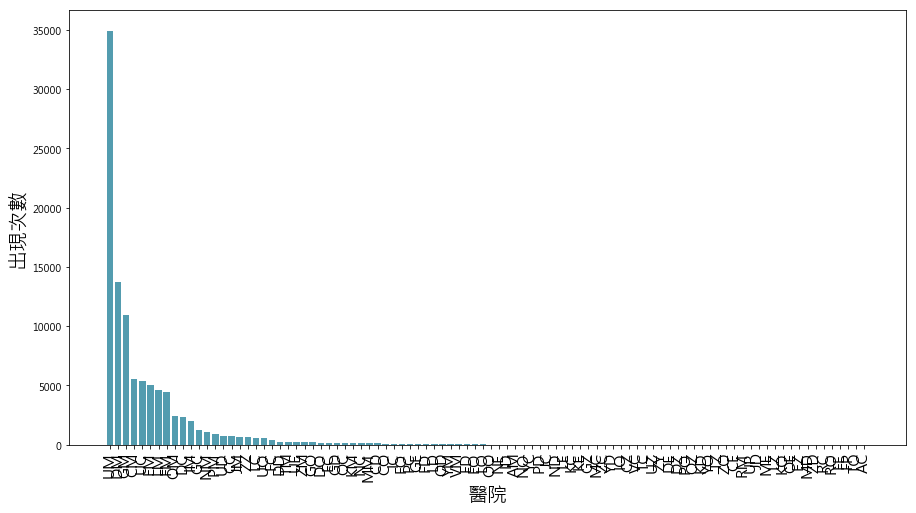

In [5]:
sectionbar = data7.sort_values(ascending = False)
namesection = list((sectionbar.index))
valuesection =sectionbar.tolist()
barplot(namesection, valuesection, x_label ='醫院', y_label = '出現次數')

In [7]:
#扣除總案件數 < 200的地區
sectionbar2 = data7.sort_values(ascending = True)
sectionbar2[:70].index

Index(['AC', 'TO', 'FP', 'FE', 'RO', 'RC', 'ZD', 'MD', 'EZ', 'OE', 'KO', 'LZ',
       'ME', 'JD', 'UP', 'RM', 'CE', 'ZO', 'TZ', 'YO', 'KD', 'OZ', 'PO', 'DZ',
       'DE', 'ZY', 'UZ', 'TC', 'VC', 'CZ', 'IO', 'YD', 'ZC', 'MC', 'GZ', 'KE',
       'KC', 'LE', 'ND', 'JC', 'PD', 'YC', 'NO', 'AM', 'ID', 'NE', 'OO', 'LO',
       'EO', 'ED', 'VM', 'YM', 'OD', 'LD', 'FD', 'GE', 'PC', 'FO', 'IC', 'CO',
       'CD', 'MM', 'NC', 'KM', 'OC', 'GD', 'EC', 'DO', 'GO', 'ZM'],
      dtype='object', name='HOSP_CODE')

In [6]:
data7.index

Index(['AC', 'AM', 'CC', 'CD', 'CE', 'CM', 'CO', 'CZ', 'DC', 'DD', 'DE', 'DM',
       'DO', 'DZ', 'EC', 'ED', 'EM', 'EO', 'EZ', 'FC', 'FD', 'FE', 'FM', 'FO',
       'FP', 'GC', 'GD', 'GE', 'GM', 'GO', 'GZ', 'IC', 'ID', 'IM', 'IO', 'JC',
       'JD', 'JM', 'KC', 'KD', 'KE', 'KM', 'KO', 'LC', 'LD', 'LE', 'LM', 'LO',
       'LZ', 'MC', 'MD', 'ME', 'MM', 'NC', 'ND', 'NE', 'NM', 'NO', 'OC', 'OD',
       'OE', 'OM', 'OO', 'OZ', 'PC', 'PD', 'PM', 'PO', 'RC', 'RM', 'RO', 'TC',
       'TM', 'TO', 'TZ', 'UC', 'UD', 'UE', 'UM', 'UO', 'UP', 'UZ', 'VC', 'VM',
       'YC', 'YD', 'YM', 'YO', 'ZC', 'ZD', 'ZM', 'ZO', 'ZY', 'ZZ'],
      dtype='object', name='HOSP_CODE')

In [7]:
data9 = data7.drop(index = ['AC', 'TO', 'FP', 'FE', 'RO', 'RC', 'ZD', 'MD', 'EZ', 'OE', 'KO', 'LZ',
       'ME', 'JD', 'UP', 'RM', 'CE', 'ZO', 'TZ', 'YO', 'KD', 'OZ', 'PO', 'DZ',
       'DE', 'ZY', 'UZ', 'TC', 'VC', 'CZ', 'IO', 'YD', 'ZC', 'MC', 'GZ', 'KE',
       'KC', 'LE', 'ND', 'JC', 'PD', 'YC', 'NO', 'AM', 'ID', 'NE', 'OO', 'LO',
       'EO', 'ED', 'VM', 'YM', 'OD', 'LD', 'FD', 'GE', 'PC', 'FO', 'IC', 'CO',
       'CD', 'MM', 'NC', 'KM', 'OC', 'GD', 'EC', 'DO', 'GO', 'ZM'])
data9.index

Index(['CC', 'CM', 'DC', 'DD', 'DM', 'EM', 'FC', 'FM', 'GC', 'GM', 'IM', 'JM',
       'LC', 'LM', 'NM', 'OM', 'PM', 'TM', 'UC', 'UD', 'UE', 'UM', 'UO', 'ZZ'],
      dtype='object', name='HOSP_CODE')

In [8]:
name7 = data7.index
name8 = list(name7)
name9 = data9.index
illist = []
illist100 = []
for i in name7:
    a = sectiongroup.get_group(str(i))["illness_code_desc"]
    illist.append(a.values)

for i in name9:
    a3 = sectiongroup.get_group(str(i))["illness_code_desc"]
    illist100.append(a3.values)

In [9]:
illdict = []
illdict100 = []

from collections import Counter
for small in illist:
    illdict.append((Counter(small)))
    
for small in illist100:
    illdict100.append((Counter(small)))

type((illdict[0].most_common())[0])

for i in range(len(illdict)):
    print(name8[i] + ' ' + str(illdict[i].most_common(3)))

AC [('胸部之脫臼，扭，拉，挫，捩傷', 1)]
AM [('椎間板脫（突）出症,壓迫症(含根神經)', 2), ('其他神經系統疾病', 2), ('其他部位之脫臼，扭，拉，挫，捩傷', 2)]
CC [('肩及上臂之脫臼，扭，拉，挫，捩傷', 147), ('踝及足之脫臼，扭，拉，挫，捩傷', 132), ('腕及手之脫臼，扭，拉，挫，捩傷', 105)]
CD [('牙及其支持組織之疾病', 55), ('牙齒斷裂', 32), ('牙周病', 26)]
CE [('橈骨骨折', 1), ('白內障', 1)]
CM [('手之外傷', 308), ('頭部其他部位外傷', 243), ('膝及小腿之脫臼，扭，拉，挫，捩傷', 141)]
CO [('醫療行為必要之剖腹產', 59), ('治療性流產', 20), ('其他懷孕，生產及產褥之合併症', 7)]
CZ [('踝及足之脫臼，扭，拉，挫，捩傷', 2), ('腕及手之脫臼，扭，拉，挫，捩傷', 2), ('腰及背部之脫臼，扭，拉，挫，捩傷', 1)]
DC [('腰及背部之脫臼，扭，拉，挫，捩傷', 412), ('肩及上臂之脫臼，扭，拉，挫，捩傷', 400), ('踝及足之脫臼，扭，拉，挫，捩傷', 370)]
DD [('牙及其支持組織之疾病', 108), ('牙齒斷裂', 87), ('牙周病', 34)]
DE [('腓骨骨折', 1), ('其他骨骼肌肉結締組織疾病', 1), ('膝及小腿之外傷', 1)]
DM [('手之外傷', 535), ('乳房之惡性腫瘤', 451), ('頭部其他部位外傷', 373)]
DO [('醫療行為必要之剖腹產', 76), ('子宮疾患（發炎,粘連,出血,肥大,後屈,糜爛等）', 29), ('治療性流產', 26)]
DZ [('踝及足之脫臼，扭，拉，挫，捩傷', 2), ('腕及手之脫臼，扭，拉，挫，捩傷', 1), ('掌骨骨折（含指骨）', 1)]
EC [('膝及小腿之脫臼，扭，拉，挫，捩傷', 33), ('腰及背部之脫臼，扭，拉，挫，捩傷', 30), ('踝及足之脫臼，扭，拉，挫，捩傷', 23)]
ED [('牙及其支持組織之疾病', 26), ('牙齒斷裂', 11), ('牙周病', 2)]
EM [('直腸息肉/大

In [10]:
illdict = pd.DataFrame(illdict)
illdict.reindex(index = name7)
(illdict.index) = name7
illdict

,0,一般剖腹產,三酸甘油脂異常,上肢,上肢神經損傷,下肢,下肢神經損傷,下肢（大，小腿）截斷傷,不明熱,中暑,...,高脂蛋白血症,高血壓,高血壓性心臟病,麥粒腫,黃斑部病變,黃疸,鼻中膈彎曲及鼻息肉,鼻咽癌,鼻炎,鼻竇炎
HOSP_CODE,,,,,,,,,,,,,,,,,,,,,
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CM,1.0,1.0,NaN,77.0,NaN,53.0,NaN,2.0,1.0,NaN,...,NaN,5.0,1.0,8.0,2.0,2.0,4.0,5.0,6.0,10.0
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,1.0,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
illdict100 = pd.DataFrame(illdict100)
illdict100.reindex(index = name9)
illdict100.index = list(name9)
illdict100

,0,一般剖腹產,三酸甘油脂異常,上肢,上肢神經損傷,下肢,下肢神經損傷,下肢（大，小腿）截斷傷,不明熱,中暑,...,高脂蛋白血症,高血壓,高血壓性心臟病,麥粒腫,黃斑部病變,黃疸,鼻中膈彎曲及鼻息肉,鼻咽癌,鼻炎,鼻竇炎
CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CM,1.0,1.0,NaN,77.0,NaN,53.0,NaN,2.0,1.0,NaN,...,NaN,5.0,1.0,8.0,2.0,2.0,4.0,5.0,6.0,10.0
DC,1.0,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DM,1.0,1.0,1.0,85.0,14.0,87.0,NaN,NaN,4.0,NaN,...,3.0,11.0,4.0,19.0,47.0,5.0,54.0,85.0,23.0,44.0
EM,NaN,NaN,NaN,21.0,2.0,20.0,NaN,NaN,NaN,NaN,...,1.0,6.0,1.0,7.0,16.0,1.0,10.0,28.0,4.0,8.0
FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,1.0,NaN,NaN,31.0,5.0,32.0,NaN,NaN,1.0,NaN,...,NaN,5.0,1.0,6.0,10.0,NaN,19.0,14.0,25.0,17.0
GC,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM,2.0,2.0,NaN,73.0,7.0,81.0,2.0,1.0,1.0,NaN,...,3.0,16.0,6.0,13.0,60.0,3.0,20.0,58.0,12.0,22.0


嘗試用地區分類做關聯性分析

In [63]:
dff = illdict.T.fillna(False)
dff.columns

Index(['AC', 'AM', 'CC', 'CD', 'CE', 'CM', 'CO', 'CZ', 'DC', 'DD', 'DE', 'DM',
       'DO', 'DZ', 'EC', 'ED', 'EM', 'EO', 'EZ', 'FC', 'FD', 'FE', 'FM', 'FO',
       'FP', 'GC', 'GD', 'GE', 'GM', 'GO', 'GZ', 'IC', 'ID', 'IM', 'IO', 'JC',
       'JD', 'JM', 'KC', 'KD', 'KE', 'KM', 'KO', 'LC', 'LD', 'LE', 'LM', 'LO',
       'LZ', 'MC', 'MD', 'ME', 'MM', 'NC', 'ND', 'NE', 'NM', 'NO', 'OC', 'OD',
       'OE', 'OM', 'OO', 'OZ', 'PC', 'PD', 'PM', 'PO', 'RC', 'RM', 'RO', 'TC',
       'TM', 'TO', 'TZ', 'UC', 'UD', 'UE', 'UM', 'UO', 'UP', 'UZ', 'VC', 'VM',
       'YC', 'YD', 'YM', 'YO', 'ZC', 'ZD', 'ZM', 'ZO', 'ZY', 'ZZ'],
      dtype='object', name='HOSP_CODE')

In [13]:
dff100 = dff.drop(columns = ['AC', 'TO', 'FP', 'FE', 'RO', 'RC', 'ZD', 'MD', 'EZ', 'OE', 'KO', 'LZ',
       'ME', 'JD', 'UP', 'RM', 'CE', 'ZO', 'TZ', 'YO', 'KD', 'OZ', 'PO', 'DZ',
       'DE', 'ZY', 'UZ', 'TC', 'VC', 'CZ', 'IO', 'YD', 'ZC', 'MC', 'GZ', 'KE',
       'KC', 'LE', 'ND', 'JC', 'PD', 'YC', 'NO', 'AM', 'ID', 'NE', 'OO', 'LO',
       'EO', 'ED', 'VM', 'YM', 'OD', 'LD', 'FD', 'GE', 'PC', 'FO', 'IC', 'CO',
       'CD', 'MM', 'NC', 'KM', 'OC', 'GD', 'EC', 'DO', 'GO', 'ZM'])
dff100.columns

Index(['CC', 'CM', 'DC', 'DD', 'DM', 'EM', 'FC', 'FM', 'GC', 'GM', 'IM', 'JM',
       'LC', 'LM', 'NM', 'OM', 'PM', 'TM', 'UC', 'UD', 'UE', 'UM', 'UO', 'ZZ'],
      dtype='object', name='HOSP_CODE')

In [14]:
#dff
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(illist).transform(illist)
dfff = pd.DataFrame(te_ary, columns = illdict.columns)
graph = dfff.T
graph.columns = dff.columns
testttt = graph.loc[:, ['AC', 'AM', 'CC', 'CD', 'CE', 'CM', 'CO', 'CZ', 'DC', 'DD', 'DE', 'DM']]

In [61]:
#dff100
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(illist100).transform(illist100)
dfff111 = pd.DataFrame(te_ary, columns = illdict100.columns)
graph100 = dfff111.T
graph100.columns = dff100.columns

HOSP_CODE,AC,AM,CC,CD,CE,CM,CO,CZ,DC,DD,...,YC,YD,YM,YO,ZC,ZD,ZM,ZO,ZY,ZZ
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
一般剖腹產,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
三酸甘油脂異常,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
上肢,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,True
上肢神經損傷,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
下肢,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
下肢神經損傷,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
下肢（大，小腿）截斷傷,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
不明熱,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
中暑,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


保險總次數低於200的地區刪除，所跑出來的關聯性分析

In [43]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
minsup = 0.2
whole = apriori(graph100, min_support = minsup, use_colnames=True)

In [44]:
whole

,support,itemsets
0,0.704600,(CM)
1,0.864407,(DM)
2,0.733656,(EM)
3,0.702179,(FM)
4,0.835351,(GM)
5,0.585956,(IM)
6,0.452785,(JM)
7,0.723971,(LM)
8,0.496368,(NM)
9,0.600484,(OM)


whole做Apriori

In [45]:
#result = apriori(graph, min_support = minsup, use_colnames=True)
rules = association_rules(whole, metric="confidence", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CM),(DM),0.704600,0.864407,0.687651,0.975945,1.129034,0.078590,5.636804
1,(EM),(CM),0.733656,0.704600,0.634383,0.864686,1.227201,0.117448,2.183074
2,(CM),(EM),0.704600,0.733656,0.634383,0.900344,1.227201,0.117448,2.672623
3,(FM),(CM),0.702179,0.704600,0.607748,0.865517,1.228380,0.112992,2.196561
4,(CM),(FM),0.704600,0.702179,0.607748,0.862543,1.228380,0.112992,2.166646


In [46]:
rules = association_rules(whole, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(EM),(CM),0.733656,0.704600,0.634383,0.864686,1.227201,0.117448,2.183074
1,(CM),(EM),0.704600,0.733656,0.634383,0.900344,1.227201,0.117448,2.672623
2,(FM),(CM),0.702179,0.704600,0.607748,0.865517,1.228380,0.112992,2.196561
3,(CM),(FM),0.704600,0.702179,0.607748,0.862543,1.228380,0.112992,2.166646
4,(IM),(CM),0.585956,0.704600,0.547215,0.933884,1.325410,0.134350,4.467918


In [36]:
#rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
#rules.head()

In [37]:
#out = rules[ (rules['antecedant_len'] >= 2) &
#       (rules['confidence'] > 0.75) &
#       (rules['lift'] > 1.2) ]
#(out)

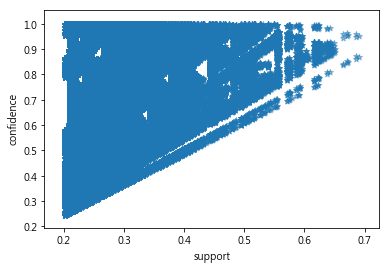

In [47]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [48]:
import networkx as nx
G = nx.DiGraph()
for i in (list(graph100.columns)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])
print(type(G))

<class 'networkx.classes.digraph.DiGraph'>


做完共現圖以後，中心過度密集，所以決定將無關地區去除以後，再次作圖。

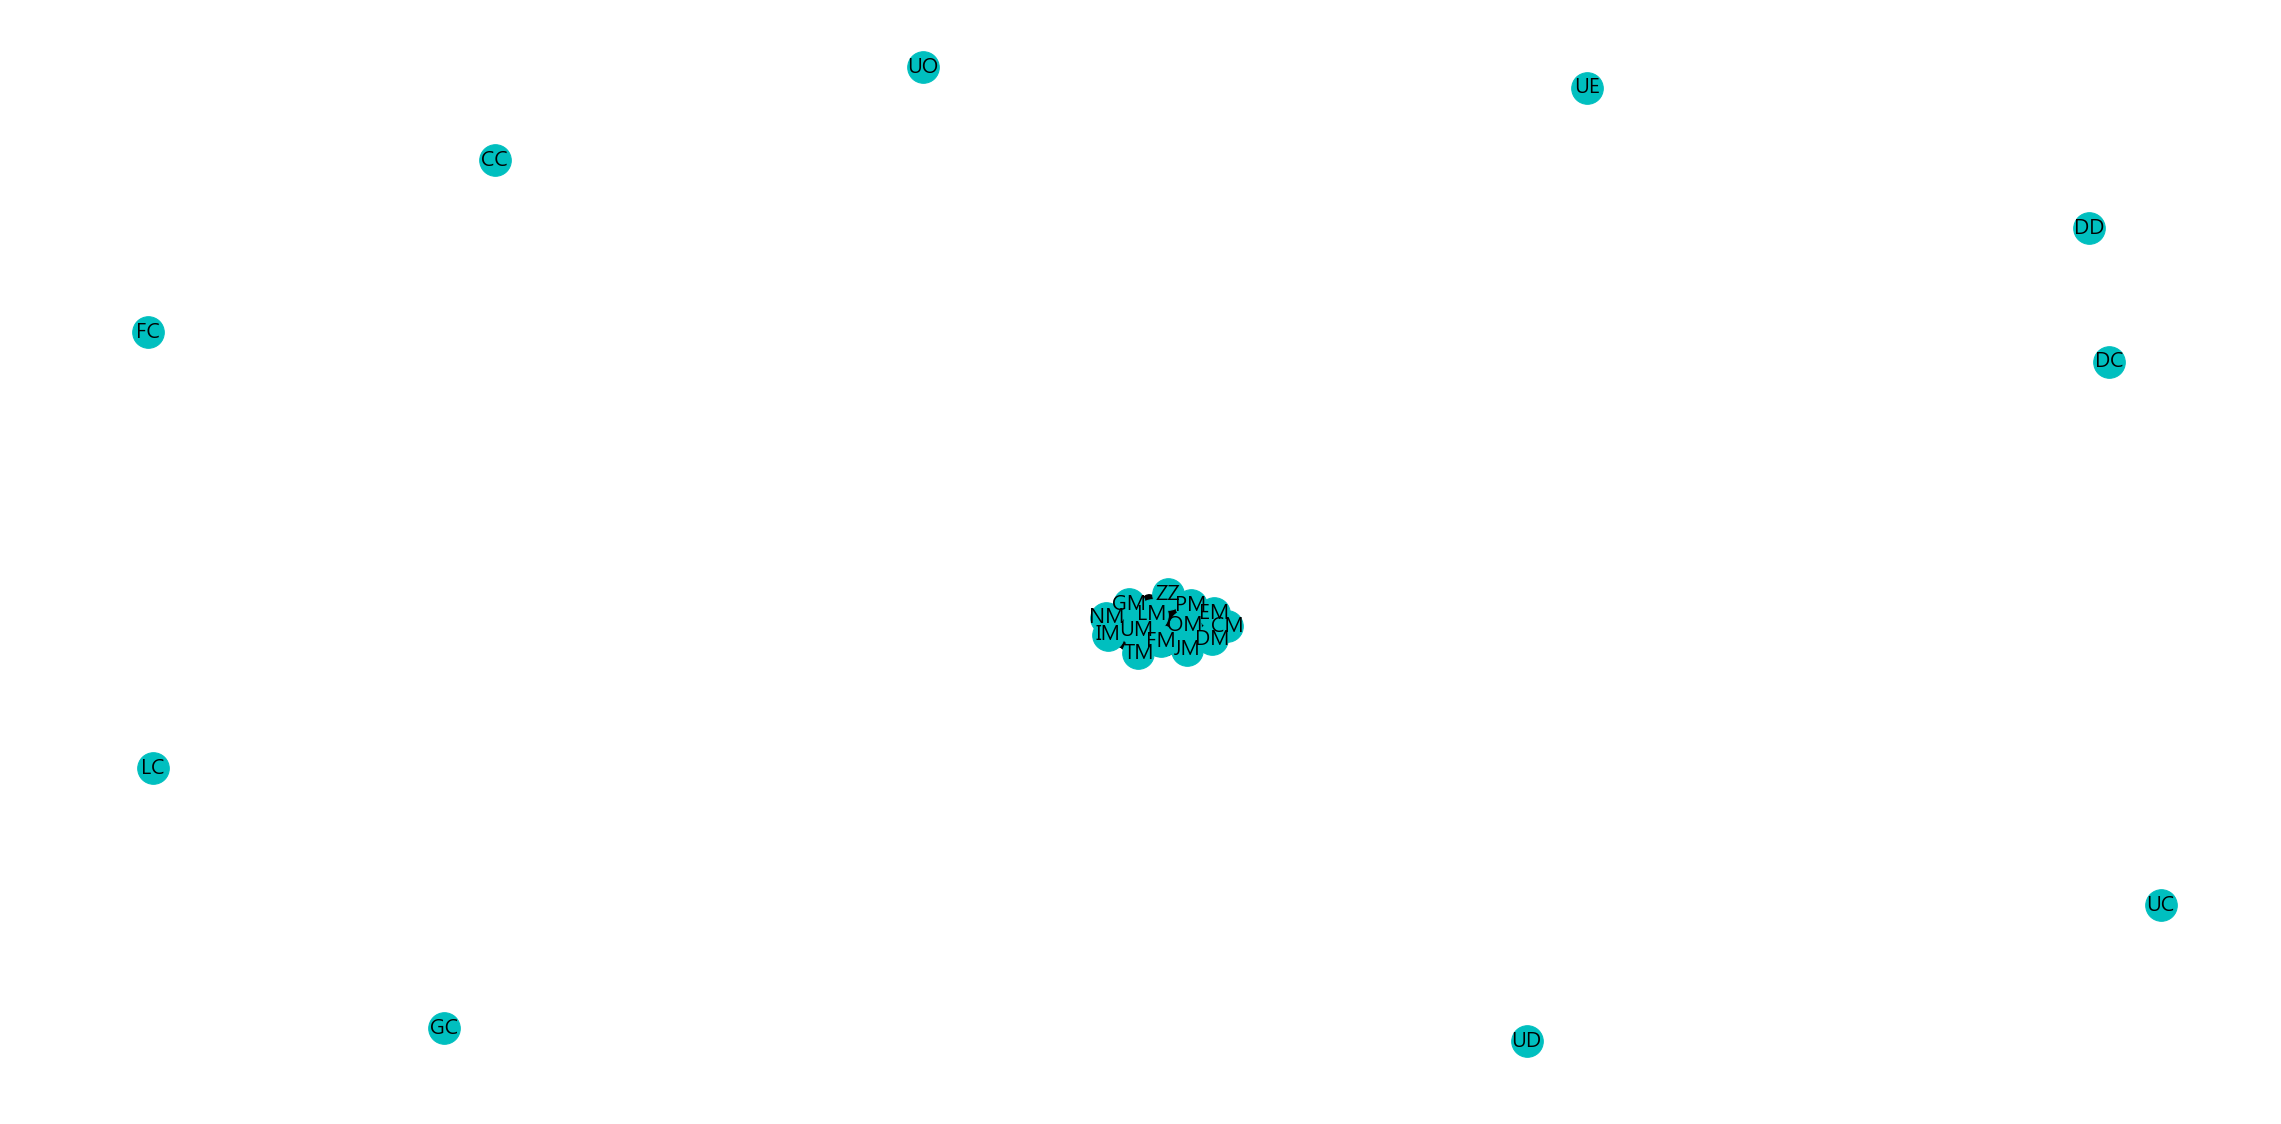

In [53]:
nodeListA = list(graph100.columns)

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist = nodeListA, node_color="c", node_size=1000)
nx.draw_networkx_edges(G, pos, width = 6)

# labels
nx.draw_networkx_labels(G,pos,font_size = 20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

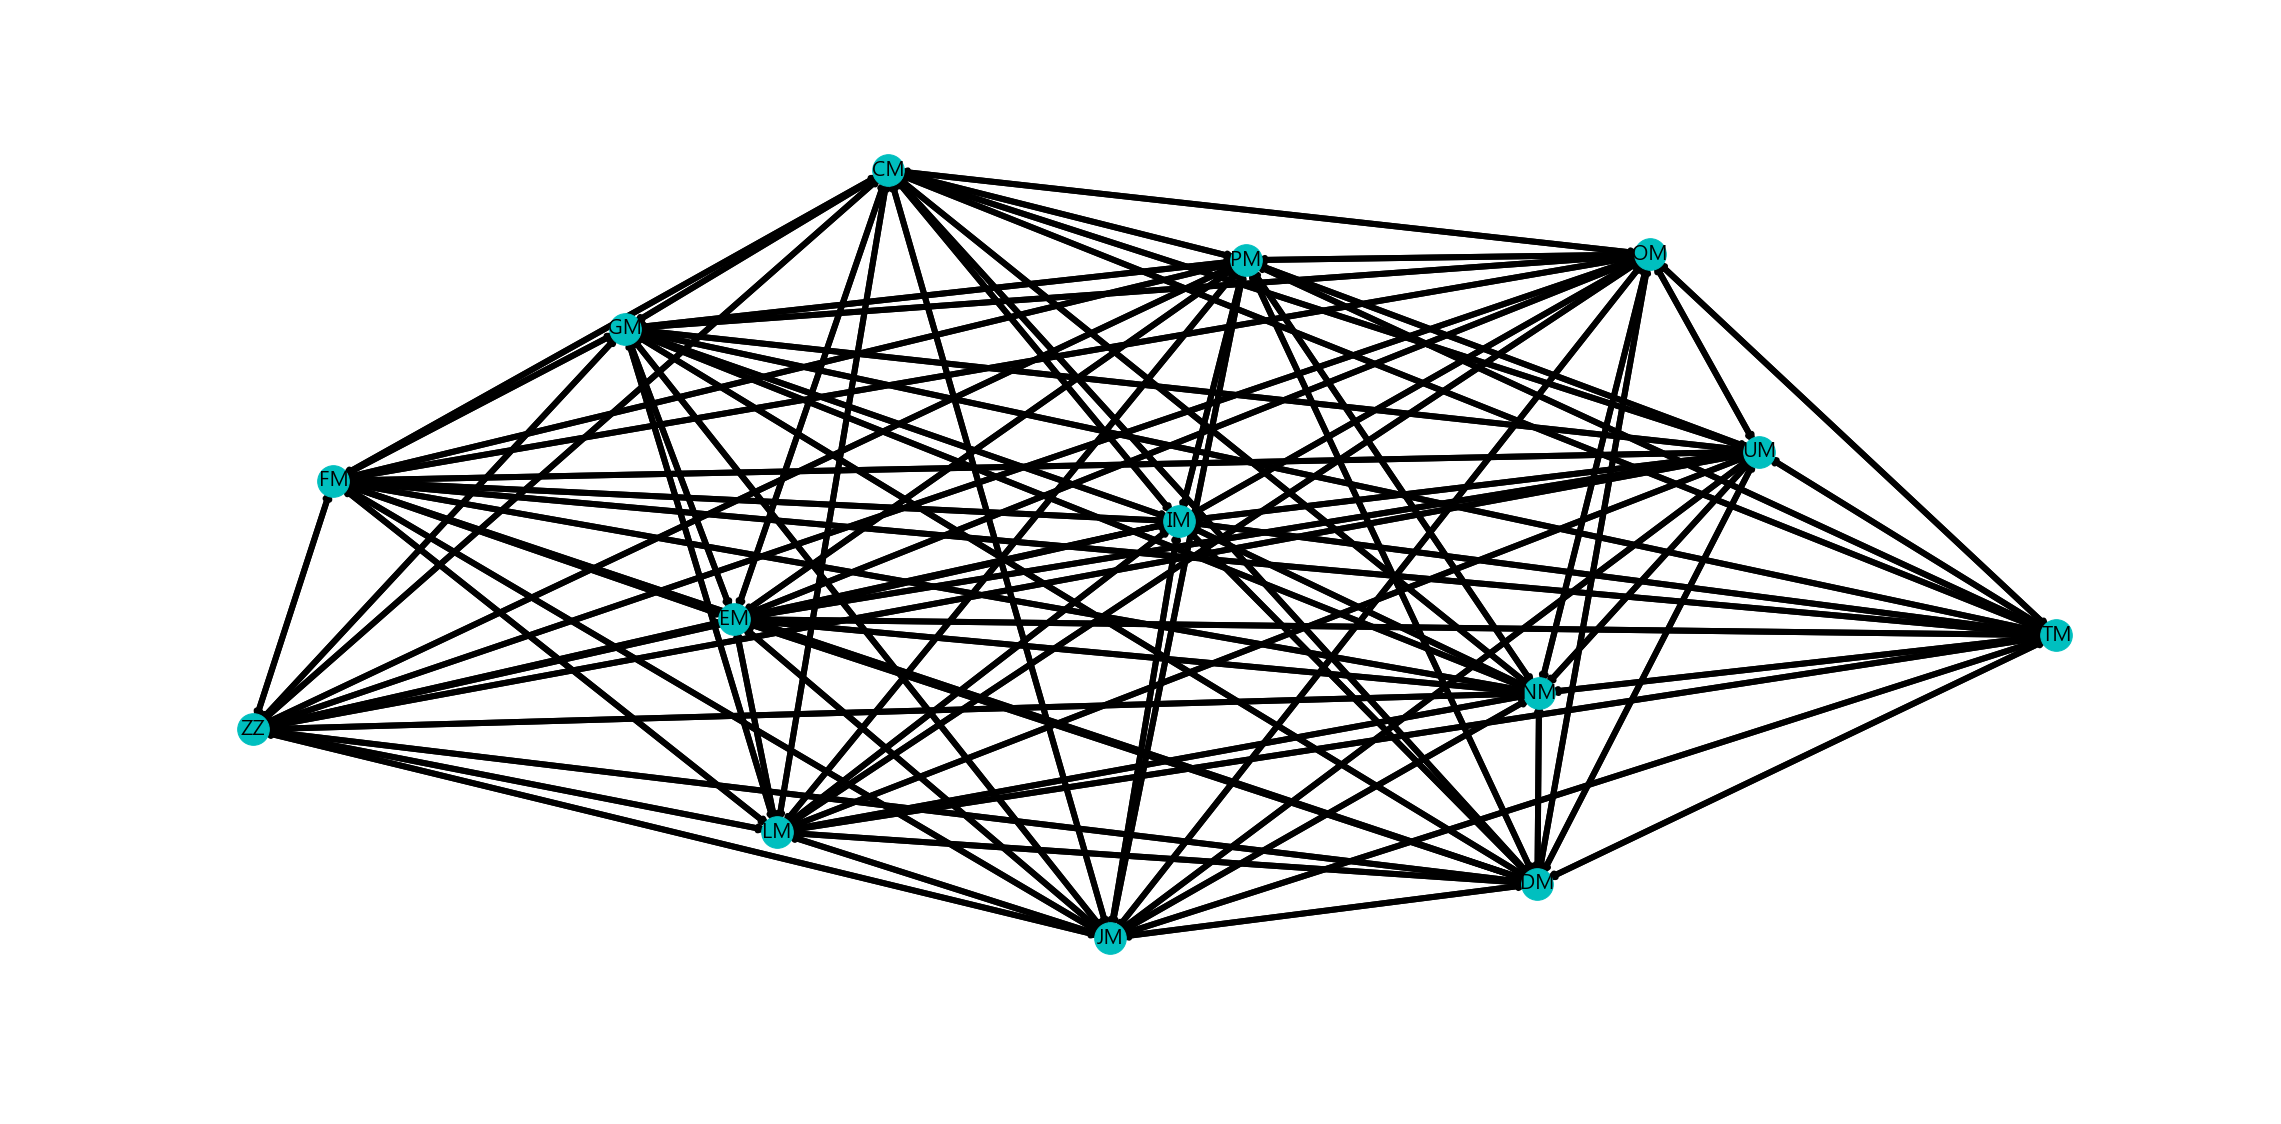

In [54]:
nodeListB = list((graph100.drop(columns = ['GC','UD','UC','DC','GC','LC','FC','CC','UO','UE','DD','DC'])).columns)

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist = nodeListB, node_color="c", node_size=1000)
nx.draw_networkx_edges(G, pos, width = 6)

# labels
nx.draw_networkx_labels(G,pos,font_size = 20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

# Decision Tree Test

In [8]:
#先將DataFrame選取要觀測的值
df8 = df.fillna(0)
df8.columns.values

array(['CASE_NO', 'INSURED_SEX', 'AGE_RANK', 'TENURE', 'ILLNESS_CD',
       'illness_code_desc', 'HOSP_CD', 'hospital_name', 'REIMB_AMT_K',
       'settle_dt', 'CountNo', 'REIMB_AMT_5Y_K', 'RECENCY_YEAR',
       'CountCovNo', 'Sum_afyp_K', 'EFFECTdate', 'TYPE_CODE', 'AFYP_K'],
      dtype=object)

In [81]:
df9 = df8.drop(columns=['illness_code_desc', 'HOSP_CD', 'hospital_name','settle_dt','CASE_NO'])
x = df9['ILLNESS_CD'].astype('category').cat.codes
sex = df9['INSURED_SEX'].astype('category').cat.codes
agge = df9['AGE_RANK'].astype('category').cat.codes
typee = df9['TYPE_CODE'].astype('category').cat.codes
print(type(x))
#df9 = df9.drop(columns = ['ILLNESS_CD']).join(pd.DataFrame(x))
df9 = df9.drop(columns = ['ILLNESS_CD','INSURED_SEX','AGE_RANK','AFYP_K','TYPE_CODE'])
df9['illness_code'] = x
df9['SEX'] = sex
df9['AGE_CATAGORY'] = agge
#df9['TYPE_CODE'] = typee
#rebuy
tttt = pd.DataFrame(rebuy)
tttt[type(tttt['EFFECTdate']) == str] = 1
df9['REBUY'] = tttt[False]
df9 = df9.drop(columns = ['EFFECTdate'])
df9 = df9.fillna(0)
#desicion tree
pd.DataFrame(df9)

<class 'pandas.core.series.Series'>


,TENURE,REIMB_AMT_K,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,illness_code,SEX,AGE_CATAGORY,REBUY
0,16,7,0.0,0.0,16,1.0,18.0,363,0,1,0.0
1,16,18,3.0,71.0,16,2.0,23.0,146,1,2,0.0
2,24,5,0.0,0.0,24,3.0,44.0,158,1,1,0.0
3,28,0,5.0,32.0,28,3.0,27.0,257,1,1,0.0
4,28,2,7.0,133.0,27,4.0,44.0,377,1,1,0.0
5,19,25,1.0,1.0,19,5.0,57.0,202,1,2,0.0
6,11,12,0.0,0.0,11,4.0,26.0,50,1,2,0.0
7,31,2,0.0,0.0,31,3.0,70.0,146,1,1,0.0
8,29,6,3.0,23.0,29,3.0,17.0,70,1,1,0.0
9,15,4,0.0,0.0,15,3.0,3.0,249,1,2,0.0


In [82]:
import sklearn.datasets as datasets
import pandas as pd
#x22 = df9.drop(columns = ['REBUY'])
print(type(x))
X = df9.values[:,0:9]
Y = df9.values[:,10]
#X = balance_data.values[:, 1:5]
#Y = balance_data.values[:,0]
Y

<class 'pandas.core.series.Series'>


array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
# Function to split the dataset 
def splitdataset(df9): 
  
    # Seperating the target variable 
    X = df9.values[:,0:9]
    Y = df9.values[:,10]
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=4, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 4, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

def main(): 
      
    # Building Phase 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(df9) 
#    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
#    print("Results Using Gini Index:") 
      
    # Prediction using gini 
#    y_pred_gini = prediction(X_test, clf_gini) 
#    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)

In [94]:
if __name__=="__main__": 
    main()

Results Using Entropy:
Predicted values:
[0. 0. 0. ... 0. 0. 0.]
Confusion Matrix:  [[31234     0]
 [ 1050     0]]
Accuracy :  96.74761491760624
Report :               precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     31234
        1.0       0.00      0.00      0.00      1050

avg / total       0.94      0.97      0.95     32284



C:\Users\Hans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


另外作法

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,Y)
#dtree.predict(x_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

用Graphviz畫出Desicision Tree尋找主要特徵


In [1]:
pd.DataFrame(df9.columns)

NameError: name 'pd' is not defined

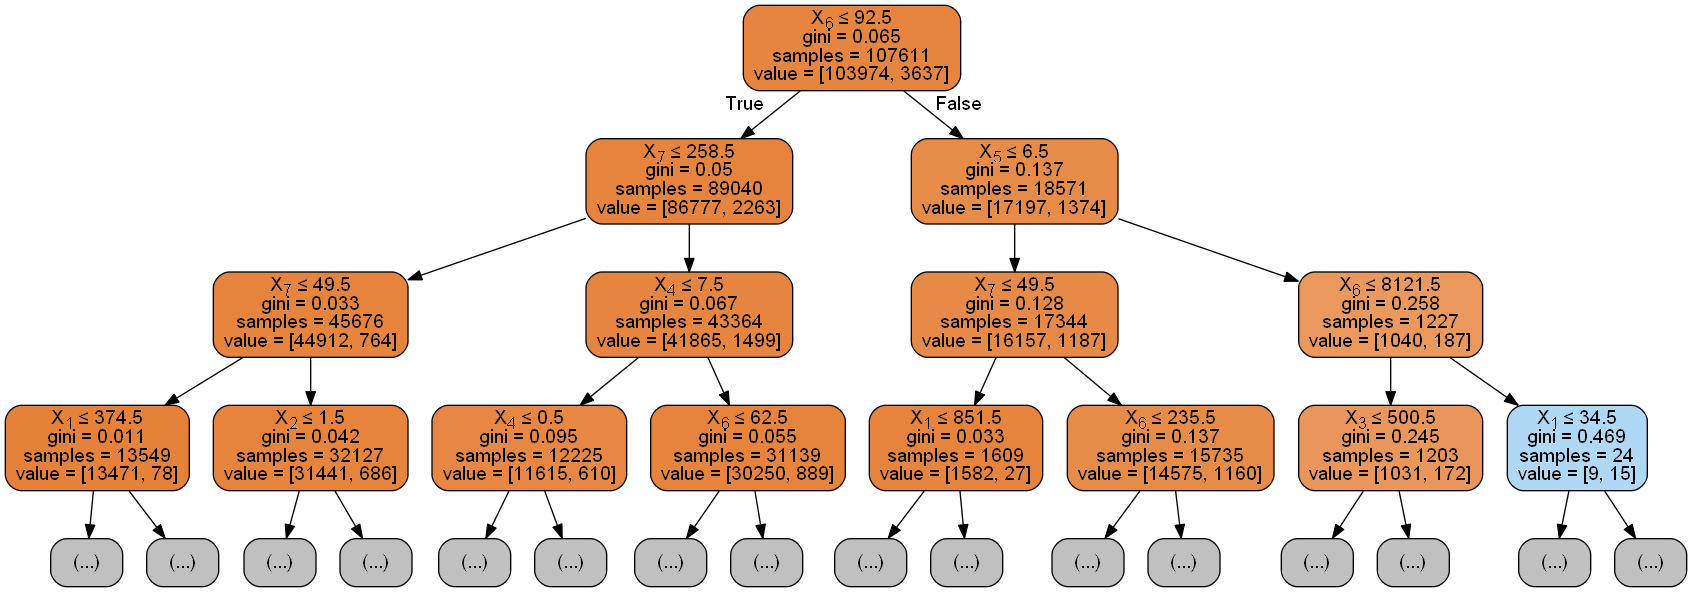

In [88]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, max_depth = 3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#Image(graph.create_svg())

In [18]:
graph.write_svg('testt.svg')

True

主要特徵為以下四項

In [59]:
test222 = pd.DataFrame(df9.columns)
test222 = test222.drop([0,1,2,3,8,9,10])
test222 = test222.reset_index()
test222.reindex(index=range(0,4))

,index,0
0,4,RECENCY_YEAR
1,5,CountCovNo
2,6,Sum_afyp_K
3,7,illness_code


## 最後跑desicion tree model預測再購
* Accuracy之所以會92%,我認為其中一個原因是再購跟沒有再購的比例差距太大。這導致模型在預測時，很容易猜到答案。

In [89]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)  

In [90]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
y_pred = classifier.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

[[29904  1330]
 [  973    77]]
             precision    recall  f1-score   support

        0.0       0.97      0.96      0.96     31234
        1.0       0.05      0.07      0.06      1050

avg / total       0.94      0.93      0.93     32284

Accuracy :  92.8664353859497
